In [1]:
import torch
import torch.nn.functional as F
import matplotlib.pyplot as plt # for making figures
%matplotlib inline

#### Dataset and input formatting

In [2]:
# read in all the words
words = open('makemore_dataset/names.txt', 'r').read().splitlines()
words[:8]

['emma', 'olivia', 'ava', 'isabella', 'sophia', 'charlotte', 'mia', 'amelia']

In [3]:
len(words)

32033

In [4]:
# map each character to an index for one-hot encoding
chars = sorted(list(set(''.join(words))))
stoi = {s:i+1 for i, s in enumerate(chars)}
stoi['.'] = 0

itos = {i:s for s, i in stoi.items()}

In [5]:
itos

{1: 'a',
 2: 'b',
 3: 'c',
 4: 'd',
 5: 'e',
 6: 'f',
 7: 'g',
 8: 'h',
 9: 'i',
 10: 'j',
 11: 'k',
 12: 'l',
 13: 'm',
 14: 'n',
 15: 'o',
 16: 'p',
 17: 'q',
 18: 'r',
 19: 's',
 20: 't',
 21: 'u',
 22: 'v',
 23: 'w',
 24: 'x',
 25: 'y',
 26: 'z',
 0: '.'}

In [6]:
x, y = [], []


for w in words[:3]:
    for c1, c2 in zip(w, w[1:]):
        i1, i2 = stoi[c1], stoi[c2]
        x.append(i1)
        y.append(i2)

xs = torch.tensor(x)
num = xs.nelement()
ys = torch.tensor(y)

In [7]:
xs, ys

(tensor([ 5, 13, 13, 15, 12,  9, 22,  9,  1, 22]),
 tensor([13, 13,  1, 12,  9, 22,  9,  1, 22,  1]))

In [8]:
# initialise the neural network weights
g = torch.Generator().manual_seed(11)
W = torch.rand((27, 27), requires_grad=True, generator=g)

#### Training loop

In [2551]:
# inputs are reinstatiated for each loop through the training data
inputs = F.one_hot(xs, num_classes=27).float()

In [2552]:
logits = (inputs @ W)
counts = logits.exp()
probs = counts / counts.sum(1, keepdim=True)
probs

tensor([[0.0031, 0.0035, 0.0034, 0.0027, 0.0027, 0.0036, 0.0048, 0.0055, 0.0040,
         0.0028, 0.0033, 0.0040, 0.0041, 0.9014, 0.0032, 0.0041, 0.0053, 0.0028,
         0.0033, 0.0029, 0.0031, 0.0053, 0.0045, 0.0036, 0.0037, 0.0051, 0.0042],
        [0.0029, 0.4559, 0.0035, 0.0029, 0.0044, 0.0036, 0.0030, 0.0046, 0.0033,
         0.0025, 0.0034, 0.0042, 0.0031, 0.4559, 0.0031, 0.0032, 0.0044, 0.0035,
         0.0044, 0.0044, 0.0042, 0.0025, 0.0027, 0.0026, 0.0042, 0.0035, 0.0042],
        [0.0029, 0.4559, 0.0035, 0.0029, 0.0044, 0.0036, 0.0030, 0.0046, 0.0033,
         0.0025, 0.0034, 0.0042, 0.0031, 0.4559, 0.0031, 0.0032, 0.0044, 0.0035,
         0.0044, 0.0044, 0.0042, 0.0025, 0.0027, 0.0026, 0.0042, 0.0035, 0.0042],
        [0.0034, 0.0037, 0.0044, 0.0039, 0.0030, 0.0038, 0.0030, 0.0026, 0.0042,
         0.0053, 0.0052, 0.0038, 0.9021, 0.0027, 0.0038, 0.0025, 0.0026, 0.0048,
         0.0049, 0.0026, 0.0050, 0.0048, 0.0031, 0.0047, 0.0044, 0.0027, 0.0027],
        [0.0031, 0.0043,

In [2553]:
# prob for each index = 1
xs

tensor([ 5, 13, 13, 15, 12,  9, 22,  9,  1, 22])

In [2554]:
# prob for eeach index = 1
ys

tensor([13, 13,  1, 12,  9, 22,  9,  1, 22,  1])

In [2555]:
# probabilities for indexes given by ys, should approach 1
probs[torch.arange(num), ys]

tensor([0.9014, 0.4559, 0.4559, 0.9021, 0.8962, 0.4544, 0.4567, 0.4544, 0.8980,
        0.4567], grad_fn=<IndexBackward0>)

In [2556]:
# characterize error with nll
loss = -probs[torch.arange(num), ys].log().mean()
loss

tensor(0.5140, grad_fn=<NegBackward0>)

In [2557]:
# backprop
W.grad = None
loss.backward()

In [2558]:
loss

tensor(0.5140, grad_fn=<NegBackward0>)

In [2559]:
W.data += -0.5 * W.grad

#### Sampling from the network

Each column of the weights matrix denotes outgoing weights from an input neuron, and can be interpreted as a probability distribution

In [2560]:
g = torch.Generator().manual_seed(11)
names = []
# sample ten words, starting at the 0-character each time
for i in range(5):
    # sample until stopping character is outputted
    ix = 0
    s = ''
    while True:
        char = itos[ix]
        s += char

        input = F.one_hot(torch.tensor(ix), num_classes=27).float()
        logits = input @ W
        counts = logits.exp()
        probs = counts / counts.sum(0, keepdim=True)

        ix = torch.multinomial(probs, generator=g, replacement=True, num_samples=1).item()

        if ix == 0:
            break
    
    names.append(s)

names

['.emavavavavaviavaviavicolivavavavaliavavaviavavavavaviviaviavavavavavzdytpdf',
 '.liavavaviavavavavix',
 '.nxemmbrjhgtnzvavvwjemaviavavaruiavavavavavivakmmmmavavivavydolivivivivivavivavavavvohndunusulivwiavivaywoluoliavavavavrrjiavavivtbzttkiavavusprgbskhemavaviavivavavavbbspfrctcewlivaviavavivavaviviavaviavivcqwavivavivaquxjnsxiavan',
 '.emkcu',
 '.knghynrwoliavavavivaviavaviaviaviavsgchcvivavpfmmavavaviaviavavavnptgviavavavaviviavaviavfuyxpyjhungemavaviagtaviaviuqoliviavakffsnqnbrxyyoliviavaviviviaviavavaviavivavkchyxvavaviavavivuaviavavavivivaviviviavwlkdukqvaviavfzceolivaolivavioliviviavavifbwnjusliavavavivavaviavavavahuqsubwh']

In [2561]:
probs

tensor([0.0559, 0.0442, 0.0371, 0.0454, 0.0290, 0.0477, 0.0220, 0.0213, 0.0532,
        0.0232, 0.0233, 0.0380, 0.0346, 0.0426, 0.0299, 0.0499, 0.0388, 0.0354,
        0.0266, 0.0547, 0.0300, 0.0345, 0.0260, 0.0314, 0.0493, 0.0520, 0.0240],
       grad_fn=<DivBackward0>)

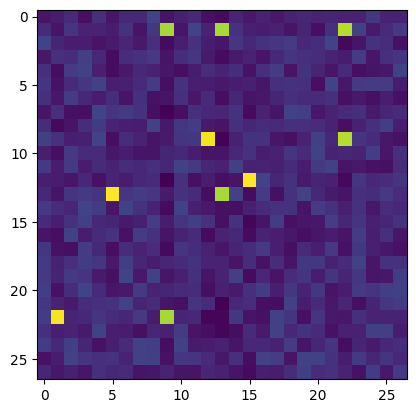

In [2562]:
weights = W
weights = weights.detach().numpy()
plt.imshow(weights.T)

### MLP implementation 

#### Dataset and input formatting

In [2643]:
import kagglehub
import pandas as pd
kagglehub.login()


Kaggle credentials set.
Kaggle credentials successfully validated.


In [2655]:
#read in all the words
words = open('makemore_dataset/names.txt', 'r').read().splitlines()
words[:8]

['emma', 'olivia', 'ava', 'isabella', 'sophia', 'charlotte', 'mia', 'amelia']

In [2564]:
# build the dataset
block_size = 3 # context length: how many characters do we take to predict the next one?

X, Y = [], []
for w in words:
  
  #print(w)
  context = [0] * block_size
  for ch in w + '.':
    ix = stoi[ch]
    X.append(context)
    Y.append(ix)
    #print(''.join(itos[i] for i in context), '--->', itos[ix])
    context = context[1:] + [ix] # crop and append
  
X = torch.tensor(X)
Y = torch.tensor(Y)

In [2565]:
X.shape

torch.Size([228146, 3])

In [2566]:
Y

tensor([ 5, 13, 13,  ..., 26, 24,  0])

In [2567]:
# training split, dev/validation split, test split
# set weights -> tune hyperparameters -> assess model performance metrics
# 80%, 10%, 10%

In [2568]:
# build the dataset
block_size = 3 # context length: how many characters do we take to predict the next one?

def build_dataset(words):  
  X, Y = [], []
  for w in words:

    #print(w)
    context = [0] * block_size
    for ch in w + '.':
      ix = stoi[ch]
      X.append(context)
      Y.append(ix)
      #print(''.join(itos[i] for i in context), '--->', itos[ix])
      context = context[1:] + [ix] # crop and append

  X = torch.tensor(X)
  Y = torch.tensor(Y)
  print(X.shape, Y.shape)
  return X, Y

import random
random.seed(42)
random.shuffle(words)
n1 = int(0.8*len(words))
n2 = int(0.9*len(words))

Xtr, Ytr = build_dataset(words[:n1])
Xdev, Ydev = build_dataset(words[n1:n2])
Xte, Yte = build_dataset(words[n2:])

torch.Size([182625, 3]) torch.Size([182625])
torch.Size([22655, 3]) torch.Size([22655])
torch.Size([22866, 3]) torch.Size([22866])


#### Initialise Network parameters

In [2596]:
g = torch.Generator().manual_seed(11)

# vector embeddings
C = torch.randn((27, 8), generator=g, requires_grad=True)

# 3*8 incoming weights for 100 neurons
W1 = torch.randn((24, 100), generator=g, requires_grad=True)
b1 = torch.randn(100, generator=g, requires_grad=True)

# 100 incoming weights for 27 neurons
W2 = torch.randn((100, 27), generator=g, requires_grad=True)
b2 = torch.randn(27, generator=g, requires_grad=True)

In [2597]:
# vector embedding of '.'
C[0]

tensor([-0.5108,  1.0283, -0.3532,  0.1230, -0.1816, -1.4972,  0.1421, -0.5243],
       grad_fn=<SelectBackward0>)

#### Training Loop

In [2613]:
epoch = 10000

In [2614]:
# learning rate

e = torch.linspace(-3, 0, epoch)
lrs = 10 ** e

In [2636]:
lossi = []
lri = []
for i in range(epoch):

    # minibatch creation
    ix = torch.randint(0, X.shape[0], (32, ))

    # forward pass
    emb = C[X[ix]]
    h = torch.tanh(emb.view(emb.shape[0], 24) @ W1 + b1)
    logits = h @ W2 + b2
    loss = F.cross_entropy(logits, Y[ix])

    # backward pass
    for p in [C, W1, b1, W2, b2]:
        p.grad = None

    loss.backward()

    # update parameters
    lr = lrs[i]

    for p in [C, W1, b1, W2, b2]:
        p.data += -0.08 * p.grad

    # track stats
    lossi.append(loss.item())
    lri.append(lr.item())

    
print(loss.item())

1.963392734527588


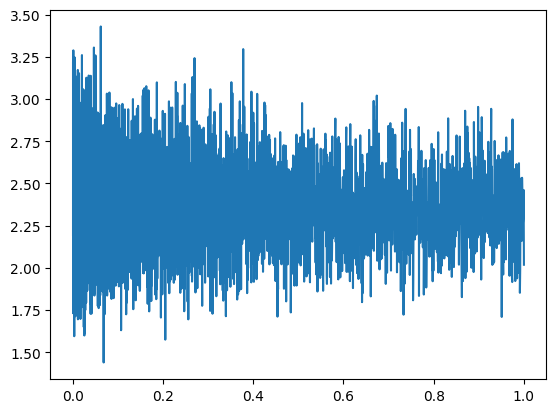

In [2623]:
# learning rate vs loss
plt.plot(lri, lossi)

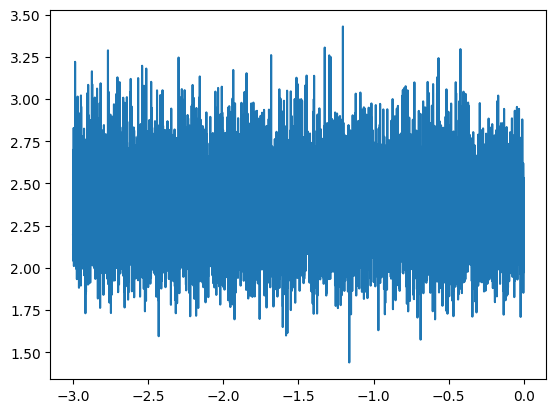

In [2624]:
# exponent of 10 vs loss
plt.plot(torch.tensor(lri).log10(), lossi)

In [2625]:
# optimal learning rate
index = torch.argmin(torch.tensor(lossi)).item()
lri[index]

0.0688626691699028

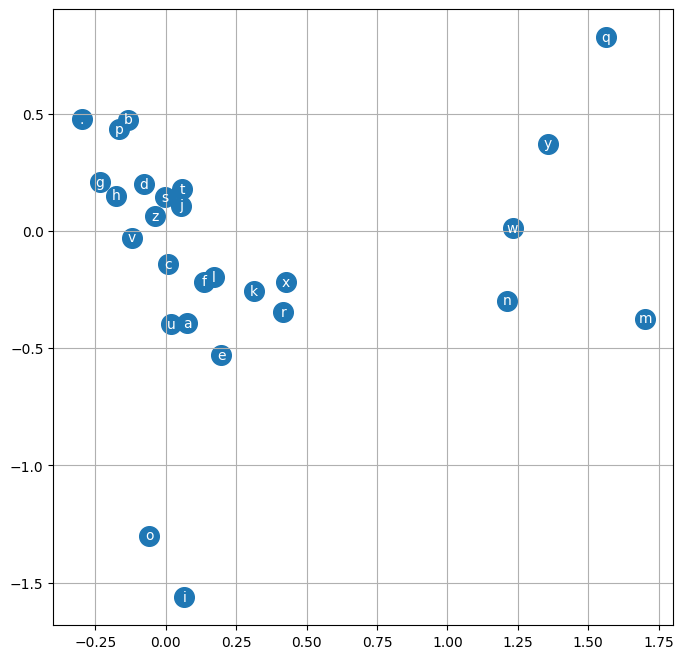

In [2626]:
# visualize dimensions 0 and 1 of the embedding matrix C for all characters
plt.figure(figsize=(8,8))
plt.scatter(C[:,0].data, C[:,1].data, s=200)
for i in range(C.shape[0]):
    plt.text(C[i,0].item(), C[i,1].item(), itos[i], ha="center", va="center", color='white')
plt.grid('minor')

#### Sample from the neural net

In [2635]:
emb.shape

torch.Size([1, 3, 8])

In [2640]:
ix = 0
for _ in range(20):

    out = []
    
    context = [0] * block_size

    while True:
        # forward pass
        emb = C[torch.tensor([context])]
        h = torch.tanh(emb.view(emb.shape[0], -1) @ W1 + b1)
        logits = h @ W2 + b2
        probs = F.softmax(logits, dim=1)

        ix = torch.multinomial(probs, num_samples=1).item()

        context = context[1:] + [ix]
        out.append(ix)

        if ix == 0:
            break

    print(''.join([itos[i] for i in out]))

donni.
ameinre.
kamleni.
shenia.
eushadda.
palanaylera.
mararianay.
nevie.
bryka.
avalonna.
vexa.
bar.
azera.
neveth.
maryan.
taya.
mariah.
yuzin.
andi.
damyah.


#### Manual training loop

In [2578]:
emb = C[X]

In [2579]:
# vector embedding of '.' in embedding table representing all inputs X
emb[0, 0]

tensor([-0.3550,  0.5315], grad_fn=<SelectBackward0>)

In [2580]:
torch.cat([emb[:,0,:], emb[:,1,:], emb[:,2,:]], 1).shape

torch.Size([228146, 6])

In [2581]:
torch.cat(torch.unbind(emb, 1), 1).shape

torch.Size([228146, 6])

In [2582]:
h = torch.tanh(emb.view(emb.shape[0], 6) @ W1 + b1)

In [2583]:
logits = h @ W2 + b2

In [2584]:
logits.shape

torch.Size([228146, 27])

In [2585]:
# manual implementation of cross entropy loss

# subtracts maximum logit to prevent exp() overflow
counts = (logits-logits.max()).exp()

# normalizees counts to probability distribution
prob = counts / counts.sum(1, keepdim=True)

loss = -prob[torch.arange(emb.shape[0]), Y].log().mean()
loss

tensor(2.5106, grad_fn=<NegBackward0>)

In [2586]:
# pytorch implementation, prevents creation of new tensors
loss = F.cross_entropy(logits, Y)
loss

tensor(2.5106, grad_fn=<NllLossBackward0>)

In [2587]:
for p in [C, W1, b1, W2, b2]:
    p.grad = None
loss.backward()
print(loss.item())

for p in [C, W1, b1, W2, b2]:
    p.data += -0.1 * p.grad

2.5106396675109863


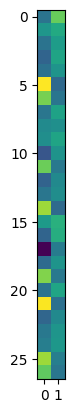

In [2588]:
v = C.detach().numpy()
plt.imshow(v)

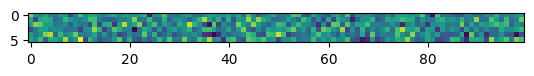

In [2589]:
v = W1.detach().numpy()
plt.imshow(v)

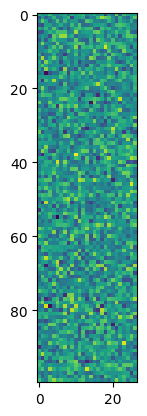

In [2590]:
v = W2.detach().numpy()
plt.imshow(v)

#### Sample from the model

In [2591]:

# sample from the model
g = torch.Generator().manual_seed(2147483647 + 10)

for _ in range(20):
    
    out = []
    context = [0] * block_size # initialize with all ...
    while True:
      emb = C[torch.tensor([context])] # (1,block_size,d)
      h = torch.tanh(emb.view(1, -1) @ W1 + b1)
      logits = h @ W2 + b2
      probs = F.softmax(logits, dim=1)
      ix = torch.multinomial(probs, num_samples=1, generator=g).item()
      context = context[1:] + [ix]
      out.append(ix)
      if ix == 0:
        break
    
    print(''.join(itos[i] for i in out))

mri.
ammyanliee.
med.
ryah.
rethas.
ekdrleg.
aderedieliiheli.
jen.
edein.
ananareelyzioh.
karin.
sadbergahiries.
kin.
renelionnteroriu.
mened.
rayshan.
ehs.
kae.
mys.
kyes.
